<a href="https://colab.research.google.com/github/isumitkumar/INSE6220/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 KB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.

To chek Version

In [3]:
from pycaret.utils import version
version()

'3.0.0'

plt.rcParams['figure.figsize'] = (7,5) set the Default Figure Size like HEight and Width in inches for matplotlib's plotting functions

In [40]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from io import StringIO
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import tree
plt.rcParams['figure.figsize'] = (7,5)

Checking Versions

In [4]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.4.4
Seaborn version:  0.12.2


**DataSet**

---


The dataset used in this study entails categorizing patients according to whether they have heart disease or not using a set of 14 different variables. Age, sex, the type of chest pain, resting blood pressure, serum cholesterol, fasting blood sugar, the maximum heart rate reached, exercise-induced angina, old peak (i.e., the ST depression brought on by exercise in comparison to rest), the slope of the peak exercise ST segment, the number of major vessels, and Thalassemia are some of these characteristics.
age (Age of the patient in years)

1. Sex -(Male-0/Female-1)
2. Cp-chest pain type ([typical angina-0, atypical angina-1, non-anginal-2, asymptomatic-3])
3. Trestbps-resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
4. Chol-(serum cholesterol in mg/dl)
5. Fbs-(if fasting blood sugar > 120 mg/dl) 1 = true; 0 = false
6. Restecg-resting electrocardiographic results ([normal-0, stt abnormality-1, lv hypertrophy-2])
7. thalach-maximum heart rate achieved
8. Exang-exercise-induced angina (1 = true; 0 = false)
9. Oldpeak-ST depression induced by exercise relative to rest
10. Slope-the slope of the peak exercise ST segment
11. Ca- number of major vessels (0-3) colored by fluoroscopy
12. Thal-[normal; fixed defect; reversible defect]
13. Target-the predicted attribute

In [5]:
df=pd.read_csv('/content/drive/MyDrive/INSE 6220/heart_disease_data.csv')
df.head(20)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    63    1   3       145   233    1        0      150      0      2.3   
1    37    1   2       130   250    0        1      187      0      3.5   
2    41    0   1       130   204    0        0      172      0      1.4   
3    56    1   1       120   236    0        1      178      0      0.8   
4    57    0   0       120   354    0        1      163      1      0.6   
5    57    1   0       140   192    0        1      148      0      0.4   
6    56    0   1       140   294    0        0      153      0      1.3   
7    44    1   1       120   263    0        1      173      0      0.0   
8    52    1   2       172   199    1        1      162      0      0.5   
9    57    1   2       150   168    0        1      174      0      1.6   
10   54    1   0       140   239    0        1      160      0      1.2   
11   48    0   2       130   275    0        1      139      0      0.2   
12   49    1   1       130   266    0        1      171      0      0.6   
13   64    1   3       110   211    0        0      144      1      1.8   
14   58    0   3       150   283    1        0      162      0      1.0   
15   50    0   2       120   219    0        1      158      0      1.6   
16   58    0   2       120   340    0        1      172      0      0.0   
17   66    0   3       150   226    0        1      114      0      2.6   
18   43    1   0       150   247    0        1      171      0      1.5   
19   69    0   3       140   239    0        1      151      0      1.8   

    slope  ca  thal  target  
0       0   0     1       1  
1       0   0     2       1  
2       2   0     2       1  
3       2   0     2       1  
4       2   0     2       1  
5       1   0     1       1  
6       1   0     2       1  
7       2   0     3       1  
8       2   0     3       1  
9       2   0     2       1  
10      2   0     2       1  
11      2   0     2       1  
12      2   0     2       1  
13      1   0     2       1  
14      2   0     2       1  
15      1   0     2       1  
16      2   0     2       1  
17      0   0     2       1  
18      2   0     2       1  
19      2   2     2       1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  1


In [21]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


In [22]:
df = df.drop_duplicates()
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


**Exploratory Data Analysis**

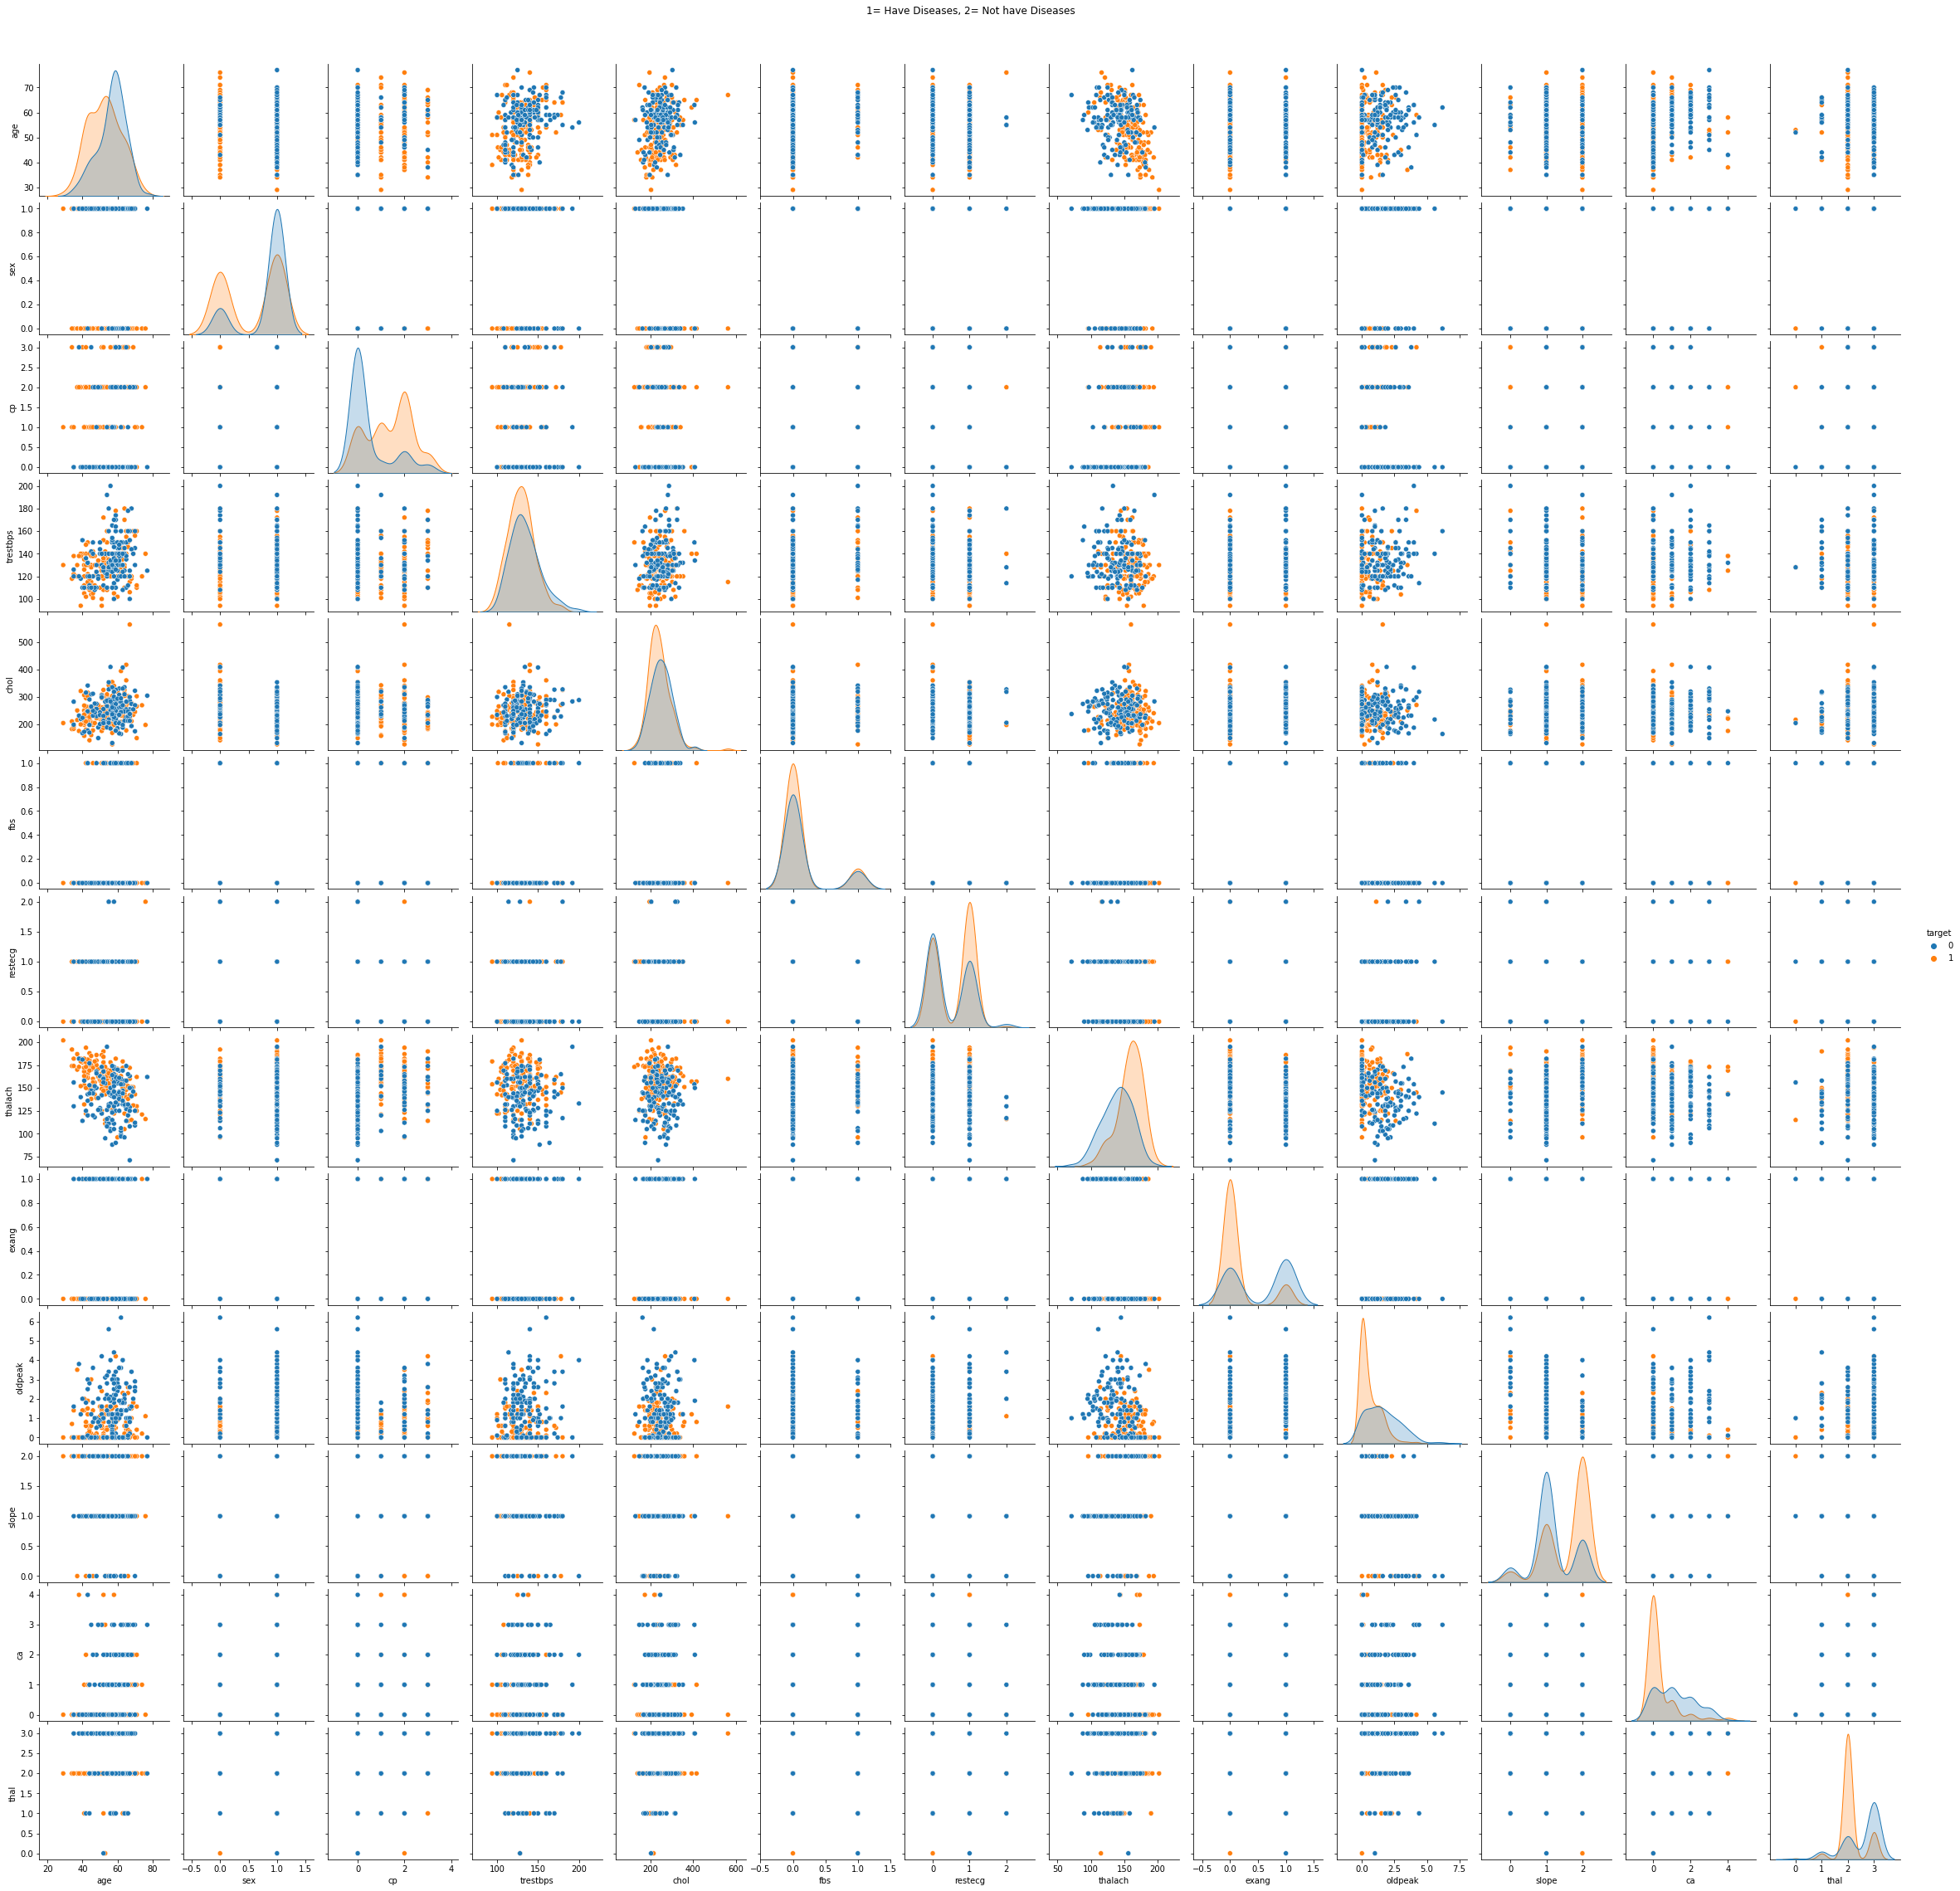

In [23]:
sns.pairplot(df, hue='target')
plt.subplots_adjust(top=0.95)
plt.suptitle('1= Have Diseases, 2= Not have Diseases')
plt.show()

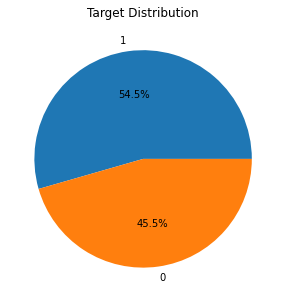

In [15]:
y = df['target']
value_counts = y.value_counts()

plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
plt.title('Target Distribution')
plt.show()

In [17]:
X = df.drop(columns=['target'])
X.head(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   
5   57    1   0       140   192    0        1      148      0      0.4      1   
6   56    0   1       140   294    0        0      153      0      1.3      1   
7   44    1   1       120   263    0        1      173      0      0.0      2   
8   52    1   2       172   199    1        1      162      0      0.5      2   
9   57    1   2       150   168    0        1      174      0      1.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  
5   0     1  
6   0     2  
7   0     3  
8   0     3  
9   0     2

In [24]:
X.describe().transpose()

count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trestbps  303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalach   303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exang     303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slope     303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
ca        303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
thal      303.0    2.313531   0.612277    0.0    2.0    2.0    3.0    3.0

**Standardize the Data**

In [25]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.952197  0.681005  1.973123  0.763956 -0.256334  2.394438 -1.005832   
1 -1.915313  0.681005  1.002577 -0.092738  0.072199 -0.417635  0.898962   
2 -1.474158 -1.468418  0.032031 -0.092738 -0.816773 -0.417635 -1.005832   
3  0.180175  0.681005  0.032031 -0.663867 -0.198357 -0.417635  0.898962   
4  0.290464 -1.468418 -0.938515 -0.663867  2.082050 -0.417635  0.898962   
5  0.290464  0.681005 -0.938515  0.478391 -1.048678 -0.417635  0.898962   
6  0.180175 -1.468418  0.032031  0.478391  0.922521 -0.417635 -1.005832   
7 -1.143291  0.681005  0.032031 -0.663867  0.323431 -0.417635  0.898962   
8 -0.260980  0.681005  1.002577  2.306004 -0.913400  2.394438  0.898962   
9  0.290464  0.681005  1.002577  1.049520 -1.512490 -0.417635  0.898962   

    thalach     exang   oldpeak     slope        ca      thal  
0  0.015443 -0.696631  1.087338 -2.274579 -0.714429 -2.148873  
1  1.633471 -0.696631  2.122573 -2.274579 -0.714429 -0.512922  
2  0.977514 -0.696631  0.310912  0.976352 -0.714429 -0.512922  
3  1.239897 -0.696631 -0.206705  0.976352 -0.714429 -0.512922  
4  0.583939  1.435481 -0.379244  0.976352 -0.714429 -0.512922  
5 -0.072018 -0.696631 -0.551783 -0.649113 -0.714429 -2.148873  
6  0.146634 -0.696631  0.224643 -0.649113 -0.714429 -0.512922  
7  1.021244 -0.696631 -0.896862  0.976352 -0.714429  1.123029  
8  0.540209 -0.696631 -0.465514  0.976352 -0.714429  1.123029  
9  1.064975 -0.696631  0.483451  0.976352 -0.714429 -0.512922

In [26]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
age       303.0  4.690051e-17  1.001654 -2.797624 -0.757280  0.069886   
sex       303.0 -1.407015e-16  1.001654 -1.468418 -1.468418  0.681005   
cp        303.0  2.345026e-17  1.001654 -0.938515 -0.938515  0.032031   
trestbps  303.0 -7.035077e-16  1.001654 -2.148802 -0.663867 -0.092738   
chol      303.0 -1.113887e-16  1.001654 -2.324160 -0.681494 -0.121055   
fbs       303.0 -2.345026e-17  1.001654 -0.417635 -0.417635 -0.417635   
restecg   303.0  1.465641e-16  1.001654 -1.005832 -1.005832  0.898962   
thalach   303.0 -6.800574e-16  1.001654 -3.439267 -0.706111  0.146634   
exang     303.0 -4.690051e-17  1.001654 -0.696631 -0.696631 -0.696631   
oldpeak   303.0  2.345026e-17  1.001654 -0.896862 -0.896862 -0.206705   
slope     303.0 -1.407015e-16  1.001654 -2.274579 -0.649113 -0.649113   
ca        303.0 -2.345026e-17  1.001654 -0.714429 -0.714429 -0.714429   
thal      303.0 -1.641518e-16  1.001654 -3.784824 -0.512922 -0.512922   

               75%       max  
age       0.731619  2.496240  
sex       0.681005  0.681005  
cp        1.002577  1.973123  
trestbps  0.478391  3.905165  
chol      0.545674  6.140401  
fbs      -0.417635  2.394438  
restecg   0.898962  2.803756  
thalach   0.715131  2.289429  
exang     1.435481  1.435481  
oldpeak   0.483451  4.451851  
slope     0.976352  0.976352  
ca        0.265082  3.203615  
thal      1.123029  1.123029

**Observations and variables**

In [30]:
observations = list(df.index)
variables = list(df.columns)
print("List of observations:")
print(observations)

print("List of variables:")
print(variables)

List of observations:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 21

Box and Whisker Plots

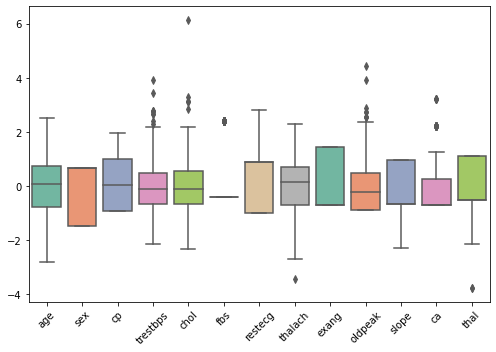

In [47]:
import os
if not os.path.exists('pyCaretImages'):
    os.makedirs('pyCaretImages')
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);
plt.tight_layout()
plt.savefig('pyCaretImages/ConvMatrix.eps', dpi = 300)

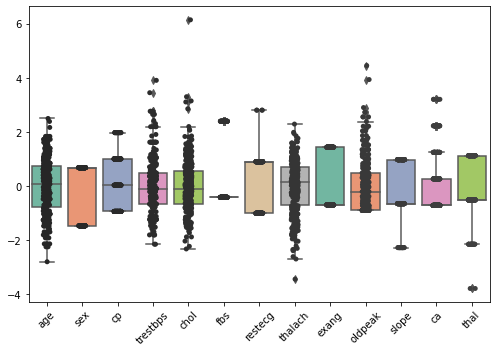

In [48]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);
plt.tight_layout()
plt.savefig('pyCaretImages/ConvMatrix.eps', dpi = 300)

**Correlation Matrix**

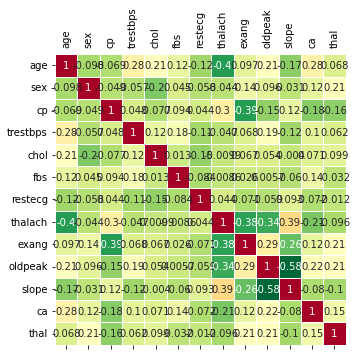

In [49]:

ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);
plt.tight_layout()
plt.savefig('pyCaretImages/ConvMatrix.eps', dpi = 300)
#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

*Principal Component Analysis (PCA)*

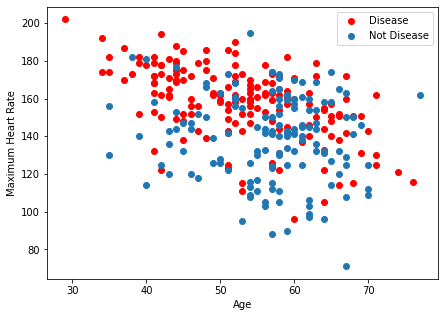

In [51]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

Eigenvector matrix:
[[ 0.31420252  0.40614872 -0.09407661 -0.0206618  -0.30715312 -0.12829615
  -0.22373018 -0.2624772  -0.37900026 -0.01672242 -0.14054369  0.54823509
   0.18181083]
 [ 0.09083783 -0.37779171  0.55484915 -0.25530873  0.0507044   0.05496875
  -0.16250682 -0.17599193 -0.1989252   0.53561904 -0.28760018 -0.01101603
   0.06093808]
 [-0.27460749  0.29726609  0.35697431  0.28790041  0.16317945 -0.19341117
  -0.21538959  0.04794993 -0.35143235  0.16435134  0.59428374 -0.09720829
   0.00635061]
 [ 0.18392019  0.43818675  0.2038493   0.02260103  0.18813809 -0.17945982
   0.33276335 -0.59533383  0.35039179  0.07152427 -0.06413037 -0.25872142
   0.0201296 ]
 [ 0.11737503  0.36451402 -0.40782498 -0.34340982  0.3200667  -0.10472957
   0.04932936  0.37238051 -0.1539752   0.49516986 -0.10887361 -0.18379048
  -0.00745311]
 [ 0.07363999  0.31743328  0.48173624 -0.06860532 -0.23344184  0.24961364
   0.51081821  0.43286301 -0.17700437 -0.15369572 -0.14210271  0.02472959
  -0.12716692]
 [

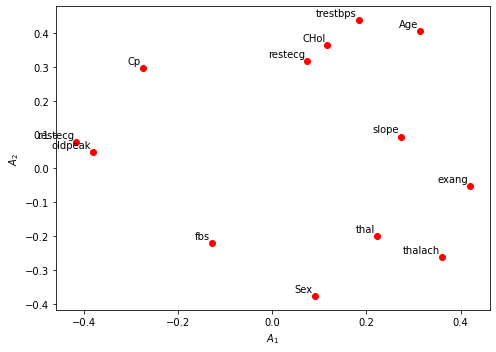

In [54]:
A = pca.components_.T 
print(f'Eigenvector matrix:\n{A}')
eigenValues = pca.explained_variance_
print(f'Eigenvalues :\n{eigenValues}')
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
clearLabels  = ['Age', 'Sex', 'Cp', 'trestbps', 'CHol', 'restecg','fbs','restecg','thalach','exang','oldpeak','slope','thal','ca']
i=0
for label, x, y in zip(clearLabels, A[:, 0], A[:, 1]):
    plt.annotate(clearLabels[i], xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
    i = i + 1
plt.tight_layout()

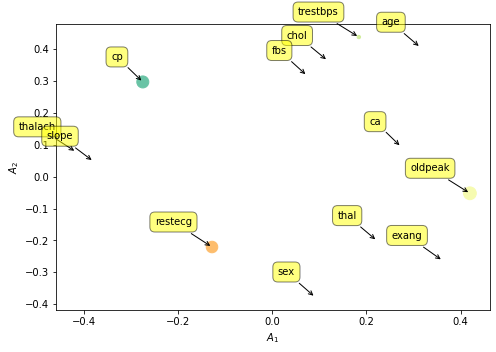

In [55]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.tight_layout()
#plt.savefig('pyCaretImages/label2.eps', rasterized=True)

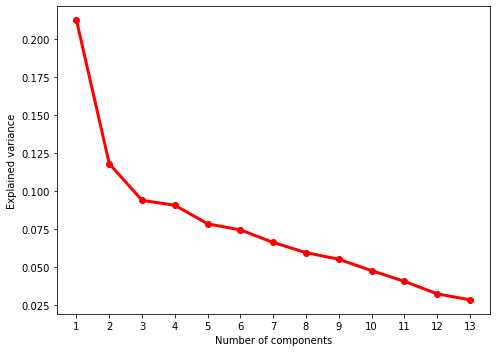

In [57]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.tight_layout()
plt.savefig('pyCaretImages/scree.eps', dpi=300)

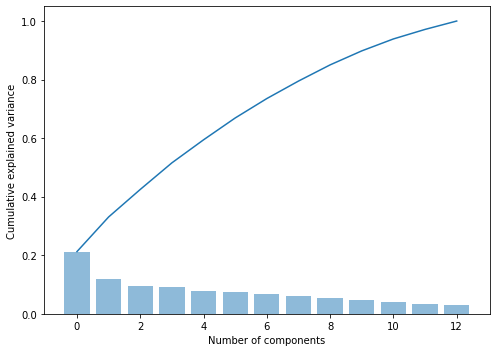

In [58]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.tight_layout()
#plt.savefig('pyCaretImages/explainedVariance.eps', rasterized=True)